In [1]:
import pandas as pd
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = SparkSession.builder.appName("Heart Disease").getOrCreate()

In [3]:
df = spark.read.csv('heart.csv', sep=',',
                         inferSchema=True, header=True)
df

DataFrame[Age: int, Sex: string, ChestPainType: string, RestingBP: int, Cholesterol: int, FastingBS: int, RestingECG: string, MaxHR: int, ExerciseAngina: string, Oldpeak: double, ST_Slope: string, HeartDisease: int]

In [4]:
heart_df = df.toPandas()
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Attribute Information<br>
Age: age of the patient [years]<br>
Sex: sex of the patient [M: Male, F: Female]<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]<br>

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(6), object(5)
memory usage: 64.7+ KB


In [6]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
heart_df.groupby('HeartDisease')['Age'].count()

HeartDisease
0    410
1    508
Name: Age, dtype: int64

In [8]:
heart_df.groupby('Sex')['Age'].count()

Sex
F    193
M    725
Name: Age, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Count'>

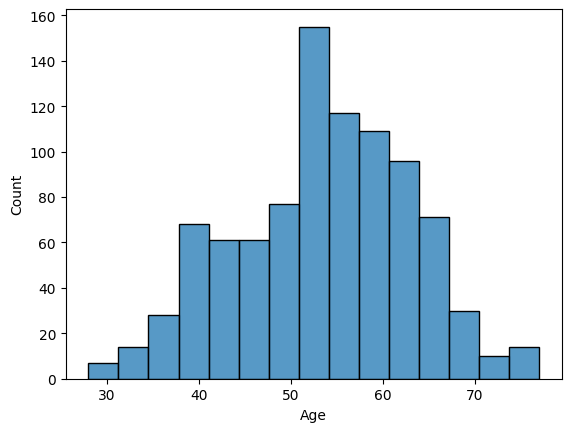

In [9]:
# Age VS Heart disease
sns.histplot(heart_df, x="Age", bins=15)

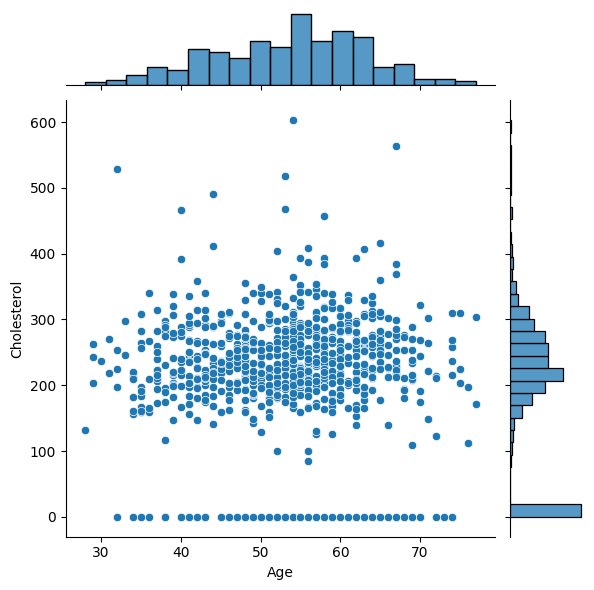

In [10]:
sns.jointplot(data=heart_df, x="Age", y='Cholesterol')

In [11]:
heart_df['Sex'] = heart_df['Sex'].apply(lambda x: 1 if x=='M' else 0)
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].apply(lambda x: 1 if x=='Y' else 0)

In [12]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


<AxesSubplot: >

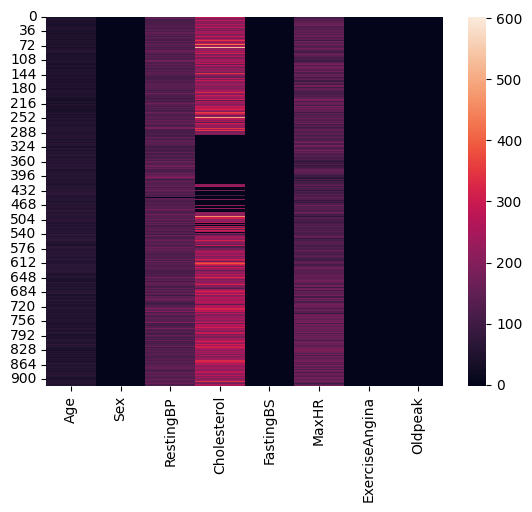

In [13]:
sns.heatmap(data=heart_df.drop(['ChestPainType', 'RestingECG', 'ST_Slope', 'HeartDisease'], axis=1))

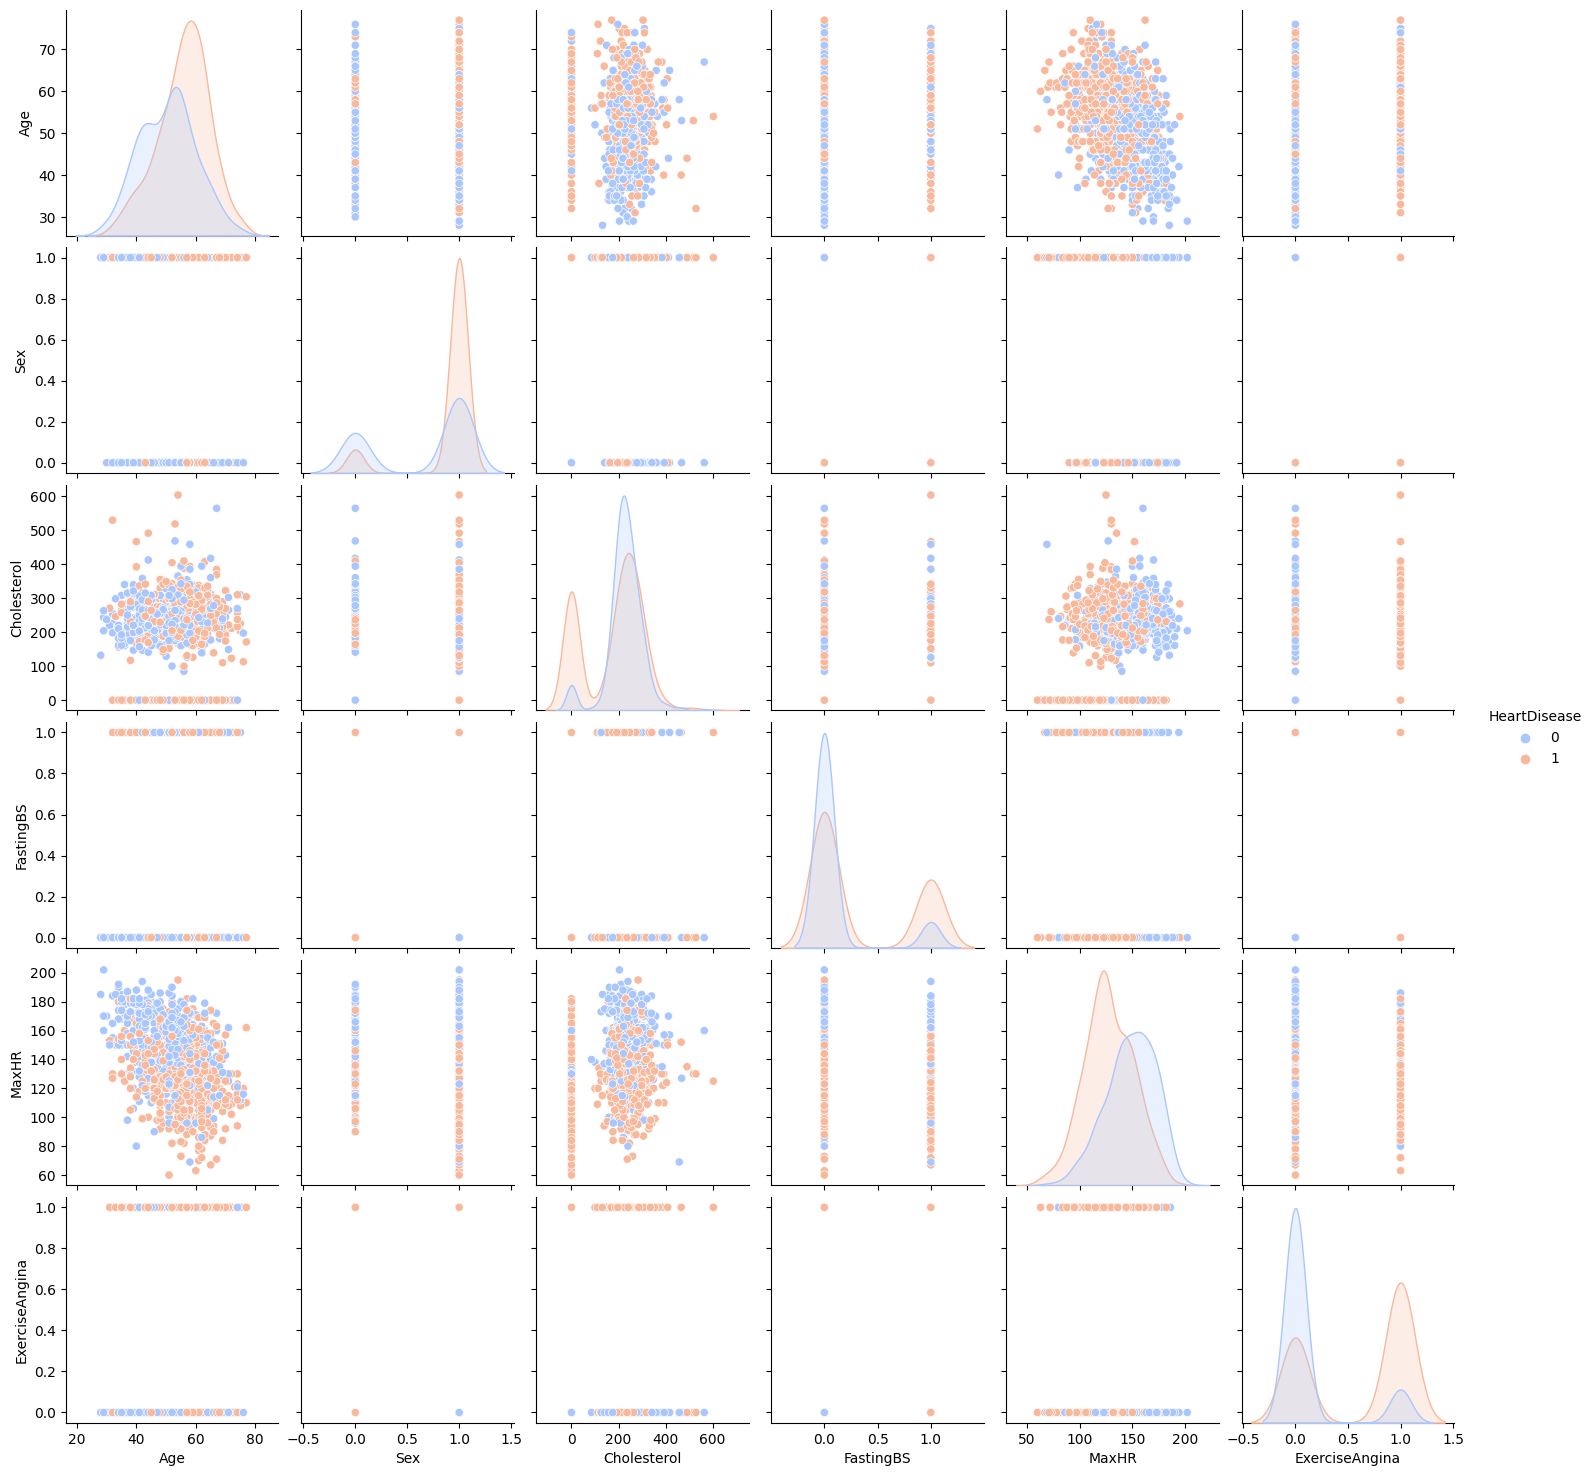

In [14]:
sns.pairplot(data=heart_df[['Age','Sex','Cholesterol','FastingBS','MaxHR','ExerciseAngina','HeartDisease']], hue='HeartDisease', palette='coolwarm')

In [15]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [16]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)



In [17]:
indexer = StringIndexer(inputCols=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], outputCols=['Gender', 'ChestPainType_cat', 'RestingECG_cat', 'ST_Slope_cat'])
indexed = indexer.fit(df).transform(df)

In [18]:
assembler = VectorAssembler(inputCols=['Age', 'RestingBP', 'FastingBS', 'RestingECG_cat', 'MaxHR', 'Gender', 'Oldpeak', 'ST_Slope_cat'], outputCol='features')

In [19]:
output = assembler.transform(indexed)
output.show()

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+------+-----------------+--------------+------------+--------------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|Gender|ChestPainType_cat|RestingECG_cat|ST_Slope_cat|            features|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+------+-----------------+--------------+------------+--------------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|   0.0|              2.0|           0.0|         1.0|(8,[0,1,4,7],[40....|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|   1.0|              1.0|           0.0|         0.0|[49.0,160.0,0.0,0...|
| 37|  M|          ATA|      130|       

In [20]:
model_df = output.select('features','HeartDisease')

In [21]:
train, test = model_df.randomSplit([.7,.3])

In [33]:
regression = LogisticRegression(labelCol='HeartDisease').fit(train)

In [34]:
prediction = regression.evaluate(test).predictions

In [35]:
prediction.select('HeartDisease','prediction').show()

+------------+----------+
|HeartDisease|prediction|
+------------+----------+
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       0.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           0|       1.0|
|           1|       1.0|
|           1|       0.0|
+------------+----------+
only showing top 20 rows



In [36]:
prediction = prediction.toPandas()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(prediction['HeartDisease'], prediction['prediction']))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       121
           1       0.84      0.88      0.86       161

    accuracy                           0.84       282
   macro avg       0.84      0.83      0.83       282
weighted avg       0.84      0.84      0.84       282



In [38]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'HeartDisease')
rfModel = rf.fit(train)
predictions_rf = rfModel.transform(test)

In [42]:
prediction_rf = predictions_rf.toPandas()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(prediction_rf['HeartDisease'], prediction_rf['prediction']))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       121
           1       0.86      0.91      0.89       161

    accuracy                           0.87       282
   macro avg       0.87      0.86      0.86       282
weighted avg       0.87      0.87      0.87       282

